In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [4]:
def parse_data(df):
    
    df["BMI_Ins_age"] = df.BMI*df.Ins_Age
    
    df["Product_Info2_let"] = df.Product_Info_2.str[0]
    df["Product_Info2_num"] = df.Product_Info_2.str[1]
    
    df["Product_Info2_let"] = pd.factorize(df.Product_Info2_let)[0]+1
    df["Product_Info_2"] = pd.factorize(df.Product_Info_2)[0]+1
    
    df['Medical_KW'] = df[['Medical_Keyword_1',
       'Medical_Keyword_2', 'Medical_Keyword_3', 'Medical_Keyword_4',
       'Medical_Keyword_5', 'Medical_Keyword_6', 'Medical_Keyword_7',
       'Medical_Keyword_8', 'Medical_Keyword_9', 'Medical_Keyword_10',
       'Medical_Keyword_11', 'Medical_Keyword_12', 'Medical_Keyword_13',
       'Medical_Keyword_14', 'Medical_Keyword_15', 'Medical_Keyword_16',
       'Medical_Keyword_17', 'Medical_Keyword_18', 'Medical_Keyword_19',
       'Medical_Keyword_20', 'Medical_Keyword_21', 'Medical_Keyword_22',
       'Medical_Keyword_23', 'Medical_Keyword_24', 'Medical_Keyword_25',
       'Medical_Keyword_26', 'Medical_Keyword_27', 'Medical_Keyword_28',
       'Medical_Keyword_29', 'Medical_Keyword_30', 'Medical_Keyword_31',
       'Medical_Keyword_32', 'Medical_Keyword_33', 'Medical_Keyword_34',
       'Medical_Keyword_35', 'Medical_Keyword_36', 'Medical_Keyword_37',
       'Medical_Keyword_38', 'Medical_Keyword_39', 'Medical_Keyword_40',
       'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43',
       'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46',
       'Medical_Keyword_47', 'Medical_Keyword_48']].sum(axis = 1)
    
    df['Na_Num'] = df.isnull().sum(axis = 1)
    
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    col = df.columns.values
    df = pd.DataFrame(imp.fit_transform(df))
    df.columns = col
    
    return df

#Matching the name of the selected features with original features`
def match(select_ls, ls):
    new_ls = []
    length = select_ls.shape[0]
    for i in np.arange(length):
        if str(select_ls[i]) == "True":
            new_ls.append(str(ls[i]))
    return new_ls

In [31]:
train = pd.read_csv("train.csv")
df = parse_data(train)
y= df.Response

11.445523142259598

In [36]:
columns_to_drop = ["Id", "Response"]
rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(df.drop(columns_to_drop, axis = 1), y)

rf2 = RandomForestClassifier(n_estimators=200, random_state=0)
rf2.fit(df.drop(columns_to_drop, axis = 1), y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [18]:
#Display the 20th first features by importances
importances = pd.DataFrame({'features': df.drop(columns_to_drop, axis = 1).columns,
                           'importances':rf.feature_importances_})
importances.sort_values(by = 'importances', ascending = False).head(40)

,features,importances
10,BMI,0.086417
9,Wt,0.057248
126,BMI_Ins_age,0.047533
51,Medical_History_15,0.038806
3,Product_Info_4,0.037139
7,Ins_Age,0.035189
11,Employment_Info_1,0.032313
8,Ht,0.028191
37,Medical_History_1,0.027610
16,Employment_Info_6,0.027561


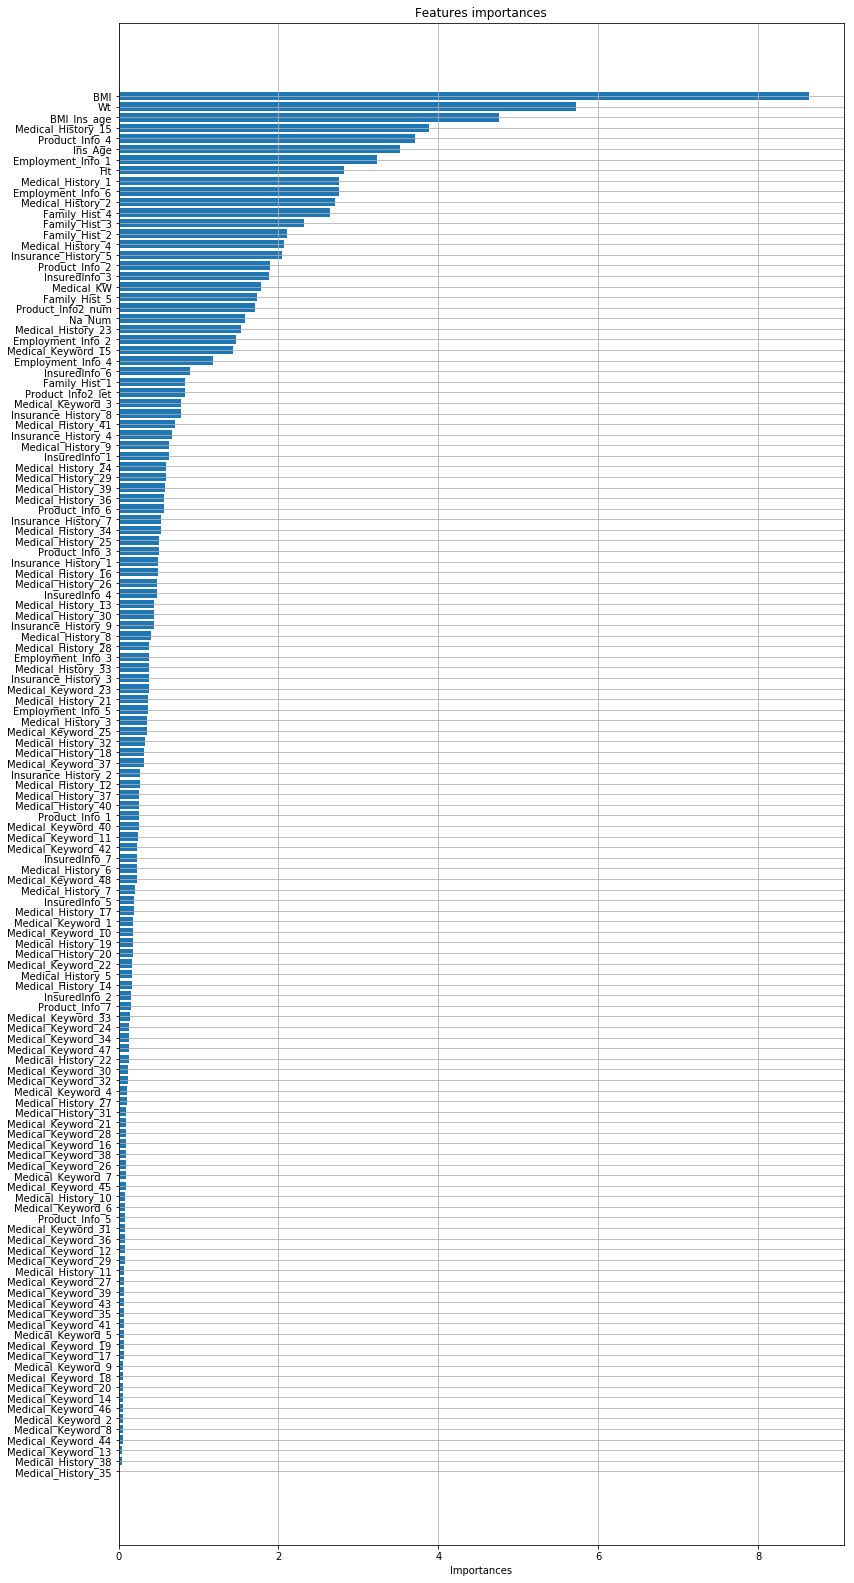

In [11]:
#plot the features importances
%matplotlib inline
importances.sort_values(by = 'importances', ascending = True, inplace =True)
val = importances.importances*100 #the bar lengths
pos = np.arange(importances.shape[0])+.5

plt.figure(figsize = (13,28))
plt.barh(pos, val, align = 'center')
plt.yticks(pos, importances.features.values)
plt.xlabel('Importances')
plt.title('Features importances')
plt.grid(True)

In [19]:
model = SelectFromModel(rf, threshold=0.005, prefit=True)
X_new = model.transform(df.drop(columns_to_drop, axis = 1))
X_new.shape  

(59381, 44)

In [20]:
match(model.get_support(), df.drop(columns_to_drop, axis = 1).columns.values)

['Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_6',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_4',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_3',
 'InsuredInfo_6',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_4',
 'Medical_History_9',
 'Medical_History_15',
 'Medical_History_23',
 'Medical_History_24',
 'Medical_History_25',
 'Medical_History_29',
 'Medical_History_34',
 'Medical_History_36',
 'Medical_History_39',
 'Medical_History_41',
 'Medical_Keyword_3',
 'Medical_Keyword_15',
 'BMI_Ins_age',
 'Product_Info2_let',
 'Product_Info2_num',
 'Medical_KW',
 'Na_Num']

In [37]:
model2 = SelectFromModel(rf2, threshold=0.005, prefit=True)
X_new2= model2.transform(df.drop(columns_to_drop, axis = 1))
X_new2.shape 

(59381, 44)

In [38]:
match(model2.get_support(), df.drop(columns_to_drop, axis = 1).columns.values)

['Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_6',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_4',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_3',
 'InsuredInfo_6',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_4',
 'Medical_History_9',
 'Medical_History_15',
 'Medical_History_23',
 'Medical_History_24',
 'Medical_History_25',
 'Medical_History_29',
 'Medical_History_34',
 'Medical_History_36',
 'Medical_History_39',
 'Medical_History_41',
 'Medical_Keyword_3',
 'Medical_Keyword_15',
 'BMI_Ins_age',
 'Product_Info2_let',
 'Product_Info2_num',
 'Medical_KW',
 'Na_Num']